# Project Title: Surviving the Storm: Investor Responses to Global Economic Downturns

# Project 1

## Introduction 
    This research aims to analyze whether economic downturns, specifically the 2008 financial crisis, have reshaped investors' investment strategies. According to Investment Cycle Theory, it emphasizes that econmic downturns create risks aversion in investors, leading to fewer but more selective investments.(Kenton) This project utilizes a comprehensive Startup Investment dataset from Kaggle, supplemented by a Macro dataset containing information on inflation, interest rates, and unemployment rates across various countries, with the focus on the period from 2000 to 2013. This timeframe allows for a comparative analysis of investment behaviors before, during, and after the crisis.
    
    
    The null hypothesis of this research question is during the significant economic downturn such as financial crisis, investors will choose the strategy of decreasing the funding amount to the startups. The x-variables will contain both inflation and unemployment rate from macro-economic perspectives, which are crucial defining the concept of economic downturns, and some categorial variables such as country and industry categories of the startups that investor's tend to invest. The categoric variables helped to define whether the strategies caused a change in the characteristics of startups that received higher amount of fundings.


In [430]:
import pandas as pd
import numpy as np

from IPython.display import display

In [431]:
objects = pd.read_csv("/Users/zzybollar/Downloads/archive/objects.csv")
objects.groupby("category_code").count().sort_values("id", ascending=False)

/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_31493/1842384648.py:1: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv("/Users/zzybollar/Downloads/archive/objects.csv")


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,status,founded_at,closed_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
category_code,,,,,,,,,,,,,,,,,,,,,
software,17922,17922,17922,0,17922,17922,17922,17922,14451,319,...,4651,17922,17922,8093,8093,17922,17922,12349,17922,17922
web,15118,15118,15118,0,15118,15118,15118,15118,12182,621,...,2849,15118,15118,7158,7158,15118,15118,9616,15118,15118
other,13617,13617,13617,0,13617,13617,13617,13617,8119,103,...,630,13617,13617,3278,3278,13617,13617,9824,13617,13617
ecommerce,9065,9065,9065,0,9065,9065,9065,9065,7367,162,...,1613,9065,9065,3688,3688,9065,9065,6310,9065,9065
games_video,7520,7520,7520,0,7520,7520,7520,7520,4794,203,...,1365,7520,7520,2612,2612,7520,7520,5702,7520,7520
mobile,6862,6862,6862,0,6862,6862,6862,6862,5143,179,...,2106,6862,6862,3512,3512,6862,6862,5213,6862,6862
advertising,6098,6098,6098,0,6098,6098,6098,6098,4978,97,...,1211,6098,6098,2814,2814,6098,6098,3975,6098,6098
consulting,5006,5006,5006,0,5006,5006,5006,5006,3853,31,...,339,5006,5006,1882,1882,5006,5006,3128,5006,5006
enterprise,4441,4441,4441,0,4441,4441,4441,4441,3414,69,...,1609,4441,4441,2306,2306,4441,4441,3302,4441,4441


In [432]:
funds = pd.read_csv("/Users/zzybollar/Downloads/archive/funds.csv")
offices = pd.read_csv("/Users/zzybollar/Downloads/archive/offices.csv")

In [433]:
investments = pd.read_csv("/Users/zzybollar/Downloads/archive/investments.csv")
investments = investments.dropna()
investments = investments.dropna(subset=['id', 'investor_object_id'])
investments = investments.drop(columns=['created_at', 'updated_at'])

investments = investments.merge(funds[['id', 'name']], on='id', how='left')

In [434]:
ipos = pd.read_csv("/Users/zzybollar/Downloads/archive/ipos.csv")
ipos = ipos.dropna(subset=['public_at'])
ipos = ipos.drop(columns=['source_url','source_description','created_at', 'updated_at'])
ipos['public_year'] = pd.to_datetime(ipos['public_at'])
ipos['public_year'] = ipos['public_year'].dt.year

In [435]:
funding_rounds = pd.read_csv("/Users/zzybollar/Downloads/archive/funding_rounds.csv")

In [436]:
inflation_interest_unemployment = pd.read_csv("/Users/zzybollar/Downloads/archive/inflation interest unemployment.csv")

In [437]:
milestones = pd.read_csv("/Users/zzybollar/Downloads/archive/milestones.csv")

In [438]:
relationships = pd.read_csv("/Users/zzybollar/Downloads/archive/relationships.csv")

In [439]:
wacc_global= pd.read_csv("/Users/zzybollar/Downloads/waccGlobal.csv")
wacc_global.columns=["Industry Name", "Number of Firms","Beta", "Cost of Equity", "E/(D+E)", "Std Dev in Stock", "Cost of Debt", "Tax Rate", "After-tax Cost of Debt", " D/(D+E)", "Cost of Capital"]

## Data Cleaning

In [440]:
inflation_interest_unemployment['year'] = inflation_interest_unemployment['year'].astype(int)
inflation_interest_unemployment_2000_to_2013 = inflation_interest_unemployment[(inflation_interest_unemployment['year'] >= 2000) & (inflation_interest_unemployment['year'] <= 2013)]
inflation_interest_unemployment_2000_to_2013 = inflation_interest_unemployment_2000_to_2013.drop(columns=['Deposit interest rate (%)', 'Lending interest rate (%)', 'iso2c'])
inflation_interest_unemployment_2000_to_2013.dropna(inplace=True)
inflation_interest_unemployment_2000_to_2013.reset_index(drop=True, inplace=True)

In [441]:
funding_rounds['id'] = funding_rounds['id'].astype(str)
funds['id'] = funds['id'].astype(str)

In [442]:
offices_cleaned = offices.dropna(subset=['city', 'region', 'zip_code','state_code'])

In [443]:
funds['funded_at'] = pd.to_datetime(funds['funded_at'], errors='coerce')

start_date = "2000-01-01"
end_date = "2013-12-31"

funding_data = funds[(funds['funded_at'] >= start_date) & (funds['funded_at'] <= end_date)].copy()
funding_data = funding_data[["id"
                             , "fund_id", "object_id", "name", "funded_at", "raised_amount", "raised_currency_code"]]
funding_data.dropna(subset=["raised_amount"], inplace=True)
funding_data["raised_amount_log"] = np.log1p(funding_data["raised_amount"])
funding_data.reset_index(drop=True, inplace=True)

In [444]:
wacc_global['Industry Name'] = wacc_global['Industry Name'].str.lower()
wacc_global['Industry Name'] = wacc_global['Industry Name'].str.replace(' ', '_')
wacc_global['Industry Name'] = wacc_global['Industry Name'].str.replace('-', '_')
wacc_global['Industry Name'] = wacc_global['Industry Name'].str.replace('&', '_')
wacc_global['Industry Name'] = wacc_global['Industry Name'].str.replace('(', '_')
wacc_global['Industry Name'] = wacc_global['Industry Name'].str.replace(')', '_')
wacc_global = wacc_global.dropna()


## Merge the data

In [445]:
funding_rounds['id'] = funding_rounds['id'].astype(str)
merged_data1 = funding_rounds.merge(objects, left_on="object_id", right_on="id", how="left")
columns_to_drop = ["id_y", "source_url", "source_description", "created_at", "updated_at", 
                   "pre_money_valuation_usd", "post_money_valuation_usd", "post_money_valuation", 
                   "pre_money_valuation", "created_by"]
existing_columns_to_drop = [col for col in columns_to_drop if col in merged_data1.columns]
merged_data1 = merged_data1.drop(columns=existing_columns_to_drop)
merged_data1.drop_duplicates(inplace=True)
merged_data1['year'] = pd.to_datetime(merged_data1['funded_at']).dt.year
merged_data1 = merged_data1[(merged_data1['year'] >= 2000) & (merged_data1['year'] <= 2013)]

In [446]:
merged_data2 = offices.merge(inflation_interest_unemployment_2000_to_2013, left_on='country_code', right_on='iso3c', how='left')
merged_data2.dropna(subset=['year'], inplace=True)
merged_data2.drop(columns=['office_id','description','state_code','iso3c','created_at','updated_at'], inplace=True)
merged_data2['year'] = merged_data2['year'].astype(int)
merged_data2 = merged_data2[(merged_data2['year'] >= 2000) & (merged_data2['year'] <= 2013)]
merged_data2.dropna(subset=['year'], inplace=True)
merged_data2.drop_duplicates("country_code", inplace=True)

In [447]:
merged_data = funding_rounds.merge(investments, on="funding_round_id", how="left", suffixes=('_funding', '_investment'))

merged_data = merged_data.merge(objects, left_on="funded_object_id", right_on="id", how="left", suffixes=('', '_object'))

merged_data = merged_data.merge(funds, on="object_id", how="left", suffixes=('', '_fund'))

merged_data = merged_data.merge(milestones, on="object_id", how="left", suffixes=('', '_milestone'))

merged_data = merged_data.merge(offices, on="object_id", how="left", suffixes=('', '_office'))

merged_data = merged_data.merge(ipos, on="object_id", how="left", suffixes=('', '_ipo'))
merged_data.drop(columns=['public_at','stock_symbol','public_year'], inplace=True)
merged_data.drop_duplicates("object_id", inplace=True)

In [448]:
merged_data_combined = merged_data.merge(merged_data2, on='country_code', how='inner')
venture_funding = merged_data_combined[merged_data_combined['funding_round_type'] == 'venture']
venture_funding_sum = venture_funding.groupby('funding_round_type')['raised_amount'].sum().reset_index()
merged_data_combined['venture_funding'] = merged_data_combined['funding_round_type'].apply(lambda x: 1 if x == 'venture' else 0) 
merged_data_combined['venture_funding_sum'] = merged_data_combined['raised_amount'].apply(lambda x: x if x > 0 else 0)
merged_data_combined['venture_funding_sum'] = merged_data_combined['venture_funding_sum'].fillna(0)
merged_data_combined['venture_funding_sum'] = merged_data_combined['venture_funding_sum'].astype(int)
merged_data_combined['venture_funding_sum'] = merged_data_combined['venture_funding_sum'].apply(lambda x: np.log1p(x))

In [449]:
merged_data_combined['raised_amount_log'] = np.log1p(merged_data_combined['raised_amount'])
merged_data_combined['raised_amount_log'] = merged_data_combined['raised_amount_log'].fillna(0)
merged_data_combined['raised_amount_log'] = merged_data_combined['raised_amount_log'].astype(int)
merged_data_combined['raised_amount_log'] = merged_data_combined['raised_amount_log'].apply(lambda x: np.log1p(x))

In [450]:
%pip install thefuzz

from thefuzz import process

def fuzzy_match(industry, industry_list):
    match, score = process.extractOne(industry, industry_list)
    return match if score >= 50 else None

merged_data_combined["category_code"] = merged_data_combined["category_code"].astype(str)

merged_data_combined["category_code"] = merged_data_combined["category_code"].apply(lambda x: fuzzy_match(x, wacc_global["Industry Name"].tolist()))
merged_data_combined = merged_data_combined.merge(wacc_global, left_on="category_code", right_on="Industry Name", how="left")
merged_data_combined.drop(columns=['Industry Name'], inplace=True)
merged_data_combined

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,id_funding,funding_round_id,object_id_x,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,Number of Firms,Beta,Cost of Equity,E/(D+E),Std Dev in Stock,Cost of Debt,Tax Rate,After-tax Cost of Debt,D/(D+E),Cost of Capital
0,270,270,c:322,2010-11-16,series-a,a,0.0,0.0,USD,0.0,...,417,1.25,11.74%,78.09%,47.41%,6.82%,14.38%,5.10%,21.91%,10.29%
1,423,423,c:538,2003-10-01,series-b,b,13000000.0,13000000.0,USD,0.0,...,165,1.07,10.68%,74.20%,33.42%,6.57%,18.87%,4.91%,25.80%,9.19%
2,487,487,c:586,2005-11-01,series-a,a,2000000.0,2000000.0,USD,0.0,...,274,0.86,9.46%,55.60%,35.95%,6.57%,13.31%,4.91%,44.40%,7.44%
3,492,492,c:600,2007-05-01,series-b,b,8000000.0,8000000.0,USD,0.0,...,417,1.25,11.74%,78.09%,47.41%,6.82%,14.38%,5.10%,21.91%,10.29%
4,514,514,c:632,2007-05-01,series-a,a,7000000.0,7000000.0,USD,0.0,...,165,1.07,10.68%,74.20%,33.42%,6.57%,18.87%,4.91%,25.80%,9.19%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,57687,57687,c:285707,2013-12-11,angel,seed,0.0,0.0,USD,0.0,...,274,0.86,9.46%,55.60%,35.95%,6.57%,13.31%,4.91%,44.40%,7.44%
1154,57713,57713,c:94485,2011-12-28,angel,seed,20000.0,20000.0,USD,0.0,...,621,0.80,9.13%,27.39%,23.78%,6.12%,21.64%,4.58%,72.61%,5.82%
1155,57866,57866,c:51014,2013-12-12,venture,unattributed,0.0,0.0,USD,0.0,...,311,1.26,11.78%,96.30%,52.92%,6.82%,11.27%,5.10%,3.70%,11.53%
1156,57867,57867,c:286063,2013-12-12,venture,unattributed,0.0,0.0,USD,0.0,...,621,0.80,9.13%,27.39%,23.78%,6.12%,21.64%,4.58%,72.61%,5.82%


In [451]:
objects.rename(columns={'id':'funded_object_id'}, inplace=True)
objects.drop(["created_at","updated_at", "logo_url", "logo_width","overview", "entity_id",
              "parent_id","normalized_name", "logo_height","short_description", "created_at", "updated_at", 
              "twitter_username","relationships", "domain", "homepage_url", "overview", "tag_list","city", 
              "region", "state_code"], axis="columns", inplace=True)

In [460]:
funding_rounds_A = funding_rounds.drop(['id', 'funding_round_id', 'funding_round_code', 'raised_amount', 'raised_currency_code', 
                                        'pre_money_valuation_usd', 'pre_money_valuation', 'pre_money_currency_code', 
                                        'post_money_valuation_usd', 'post_money_currency_code', 'participants', 'is_first_round', 
                                        'is_last_round', 'source_url', 'source_description', 'created_by', 'updated_at', 
                                        'created_at'], axis='columns')
funding_rounds_A = funding_rounds_A.drop(['post_money_valuation'], axis='columns')
funding_rounds_A = funding_rounds_A.rename(columns={'object_id': 'funded_object_id'})
funding_rounds_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   funded_object_id    52928 non-null  object 
 1   funded_at           52680 non-null  object 
 2   funding_round_type  52928 non-null  object 
 3   raised_amount_usd   52928 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


In [461]:
objects.rename(columns={'id':'funded_object_id'}, inplace=True)

df = investments.merge(objects, on='funded_object_id')
df2 = df.merge(funding_rounds_A, on='funded_object_id')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223898 entries, 0 to 223897
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   223898 non-null  int64  
 1   funding_round_id     223898 non-null  int64  
 2   funded_object_id     223898 non-null  object 
 3   investor_object_id   223898 non-null  object 
 4   name_x               5777 non-null    object 
 5   entity_type          223898 non-null  object 
 6   name_y               223898 non-null  object 
 7   permalink            223898 non-null  object 
 8   category_code        221193 non-null  object 
 9   status               223898 non-null  object 
 10  founded_at           202601 non-null  object 
 11  closed_at            8438 non-null    object 
 12  description          175292 non-null  object 
 13  country_code         220161 non-null  object 
 14  first_investment_at  3185 non-null    object 
 15  last_investment_a

In [462]:
df2.drop(['created_by', 'first_milestone_at', 'last_milestone_at', 
          'last_investment_at'], axis='columns', inplace=True)

In [463]:
df2 = df2[~(df2['country_code'].isnull() | df2['description'].isnull() | df2['funded_at'].isnull() | df2['founded_at'].isnull())]

In [464]:
dupes=df2.duplicated()

## Summary Statistics tables by time period (before, during and after crisis)

    By comparing the summary statistics of pre-, during-, and post-crisis total raised amount, it's not hard to see that the mid 50th percentile have significant increase after crisis. But it could not represent that directly that this significant increase is due to the economic downturns, but we need to take other reasons into consideration such as the lack of data for before-, and during-crisis period. 

In [479]:
before_crisis_end = "2007-09-30"
during_crisis_start = "2007-10-01"
during_crisis_end = "2009-06-30"
after_crisis_start = "2009-07-01"

In [481]:
funding_before_crisis = df2[(df2['funded_at'] >= "2000-01-01") & (df2['funded_at'] <= before_crisis_end)]
funding_during_crisis = df2[(df2['funded_at'] >= during_crisis_start) & (df2['funded_at'] <= during_crisis_end)]
funding_after_crisis = df2[(df2['funded_at'] >= after_crisis_start) & (df2['funded_at'] <= "2013-12-31")]

In [468]:
def drop_duplicate_columns(df):
    duplicate_columns = df.columns[df.columns.duplicated()]
    df = df.loc[:, ~df.columns.duplicated()]
    return df

funding_before_crisis = drop_duplicate_columns(funding_before_crisis)
funding_during_crisis = drop_duplicate_columns(funding_during_crisis)
funding_after_crisis = drop_duplicate_columns(funding_after_crisis)

In [475]:
df2.describe()

,id,funding_round_id,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,raised_amount_usd,count
count,163526.000000,163526.000000,163526.000000,163526.000000,163526.000000,1.635260e+05,163526.000000,1.635260e+05,163526.0
mean,37572.585179,21942.790003,0.154312,0.140938,4.414582,7.281733e+07,2.050867,1.324637e+07,1.0
std,23781.373652,15188.952635,5.665633,5.260096,2.422095,1.973884e+08,1.333709,5.101833e+07,0.0
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,1.0
25%,15290.250000,8737.000000,0.000000,0.000000,3.000000,7.653503e+06,1.000000,1.150000e+06,1.0
50%,37064.000000,20336.000000,0.000000,0.000000,4.000000,3.000000e+07,2.000000,5.000000e+06,1.0
75%,58467.000000,32505.250000,0.000000,0.000000,6.000000,7.290000e+07,3.000000,1.300000e+07,1.0
max,80899.000000,57948.000000,478.000000,459.000000,14.000000,5.700000e+09,9.000000,3.200000e+09,1.0


In [486]:
funding_before_crisis.describe()

,id,funding_round_id,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,raised_amount_usd,count
count,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,2.940400e+04,29404.000000,2.940400e+04,29404.0
mean,23560.530676,12940.642021,0.045776,0.041797,4.648279,7.956788e+07,2.045164,1.119212e+07,1.0
std,20651.044791,12117.600485,0.378053,0.338529,2.450965,1.575621e+08,1.640806,1.417145e+07,0.0
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,1.0
25%,6388.750000,3745.000000,0.000000,0.000000,3.000000,2.090000e+07,1.000000,3.000000e+06,1.0
50%,17882.500000,9842.000000,0.000000,0.000000,4.000000,4.350000e+07,2.000000,7.700000e+06,1.0
75%,32520.000000,18055.250000,0.000000,0.000000,6.000000,8.270000e+07,3.000000,1.400000e+07,1.0
max,80655.000000,57926.000000,9.000000,8.000000,14.000000,2.425700e+09,9.000000,2.830000e+08,1.0


In [487]:
funding_during_crisis.describe()

,id,funding_round_id,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,raised_amount_usd,count
count,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,2.604900e+04,26049.000000,2.604900e+04,26049.0
mean,27974.858497,14457.242274,0.213597,0.195708,4.624861,9.123312e+07,2.167530,1.589949e+07,1.0
std,23128.905649,13311.095239,7.688194,7.281671,2.416830,2.637307e+08,1.529161,8.755133e+07,0.0
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,1.0
25%,8036.000000,4606.000000,0.000000,0.000000,3.000000,1.440000e+07,1.000000,2.000000e+06,1.0
50%,20150.000000,9577.000000,0.000000,0.000000,4.000000,3.780000e+07,2.000000,7.000000e+06,1.0
75%,45934.000000,20851.000000,0.000000,0.000000,6.000000,7.750000e+07,3.000000,1.500000e+07,1.0
max,80898.000000,57926.000000,478.000000,459.000000,14.000000,5.700000e+09,9.000000,3.200000e+09,1.0


In [485]:
funding_after_crisis.describe()

,id,funding_round_id,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,raised_amount_usd,count
count,107520.000000,107520.000000,107520.000000,107520.000000,107520.000000,1.075200e+05,107520.000000,1.075200e+05,107520.0
mean,43795.890969,26292.182124,0.160519,0.146996,4.289946,6.624386e+07,2.018564,1.319831e+07,1.0
std,22241.725561,14545.293758,5.851969,5.388620,2.400861,1.882323e+08,1.174689,4.520224e+07,0.0
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,1.0
25%,27501.000000,14955.500000,0.000000,0.000000,3.000000,4.712997e+06,1.000000,1.000000e+06,1.0
50%,44284.000000,26070.000000,0.000000,0.000000,4.000000,2.200000e+07,2.000000,4.000000e+06,1.0
75%,62318.000000,35890.000000,0.000000,0.000000,6.000000,6.717087e+07,3.000000,1.200000e+07,1.0
max,80899.000000,57948.000000,478.000000,459.000000,14.000000,5.700000e+09,9.000000,1.500000e+09,1.0


## Plots, Figures

In [472]:
%pip install qeds charset-normalizer --force-reinstall

import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import qeds
import seaborn as sns
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
  Using cached qeds-0.7.0-py3-none-any.whl
  Obtaining dependency information for charset-normalizer from https://files.pythonhosted.org/packages/72/80/41ef5d5a7935d2d3a773e3eaebf0a9350542f2cab4eac59a7a4741fbbbbe/charset_normalizer-3.4.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Using cached charset_normalizer-3.4.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (35 kB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/52/11/9eac327a38834f162b8250aab32a6781339c69afe7574368fffe46387edf/pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Using cached requests-2.32.3-py3-none-any.w

### Pie Chart

    "Percentages of each category startup BEFORE/DURING/AFTER crisis" clearly shows the proportional distribution of each startup categories in the whole market. It provides a clear visualization of how different categories contribute to the overall startup economic system and could easily see the percentage change in 3 different time period. But there is a limitation that the whole market size are not shown, and it is undoubt that the datasize and whole market size are not the same.

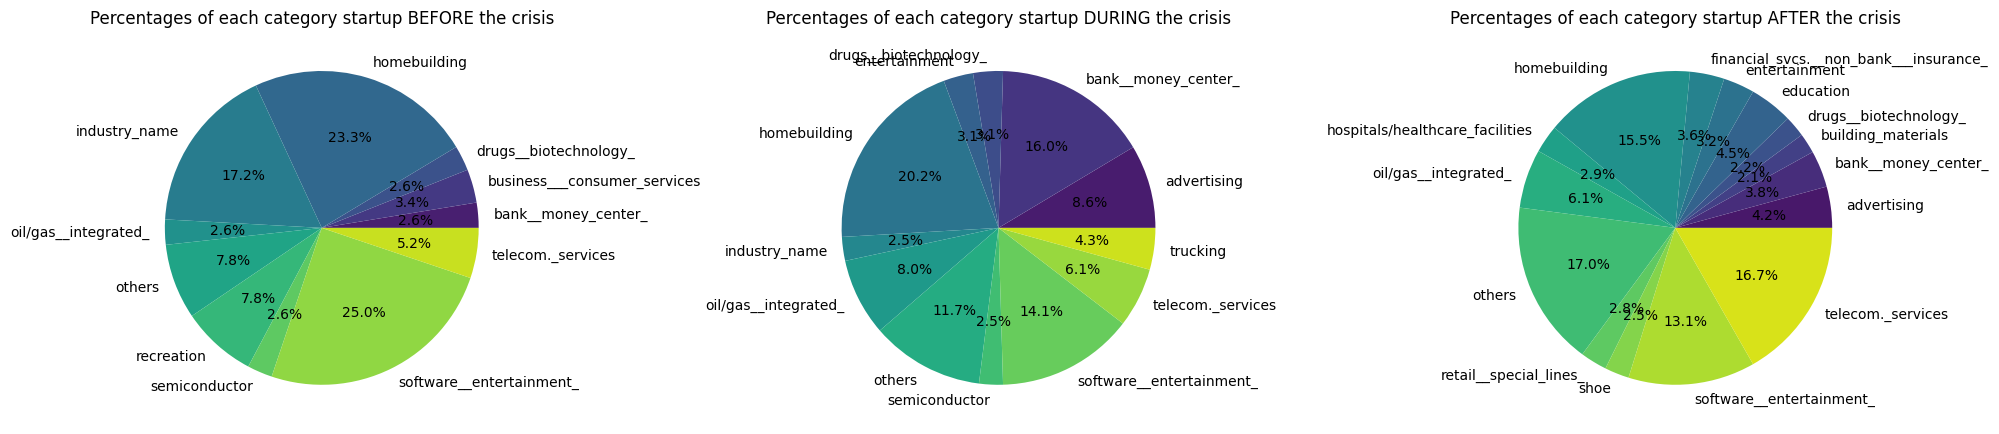

In [473]:
def calculate_category_percenrtages(data):
    category_percentages = data["category_code"].value_counts(normalize=True) * 100
    category_percentages = category_percentages.reset_index()
    category_percentages.columns = ["category_code", "percentage"]
    category_percentages['category_code'] = category_percentages.apply(lambda row: 'others' if row['percentage'] < 2 else row['category_code'], axis=1)
    category_percentages = category_percentages.groupby('category_code')['percentage'].sum().reset_index()
    return category_percentages

category_percentages_before_crisis = calculate_category_percenrtages(funding_before_crisis)
category_percentages_during_crisis = calculate_category_percenrtages(funding_during_crisis)
category_percentages_after_crisis = calculate_category_percenrtages(funding_after_crisis)

def plot_pie_chart(ax, data, title):
    ax.pie(data["percentage"], labels=data["category_code"], autopct='%1.1f%%', colors=sns.color_palette("viridis", len(data)))
    ax.set_title(title)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

plot_pie_chart(ax[0],category_percentages_before_crisis, "Percentages of each category startup BEFORE the crisis")
plot_pie_chart(ax[1],category_percentages_during_crisis, "Percentages of each category startup DURING the crisis")
plot_pie_chart(ax[2],category_percentages_after_crisis, "Percentages of each category startup AFTER the crisis")

plt.tight_layout()
plt.show()

### Box Plot

    "Distribution of funding amounts across startup categories" is a box plot of the distribution of funding amounts. This plot could know the average funding performance of each industry. It contains more details of mean, median, percentile information than the previous two visualizations. The variable for x and y-axis is appropriate since it is not hard to compare and see the difference. This graph concludes the statistics of mean, median and distribution clearly, which is helpful to conclude the funding performance of different categories. The higher funding amount of a category might due to larger number of firms in that specific category, or extreme high raised funding of top startups in that specific category.

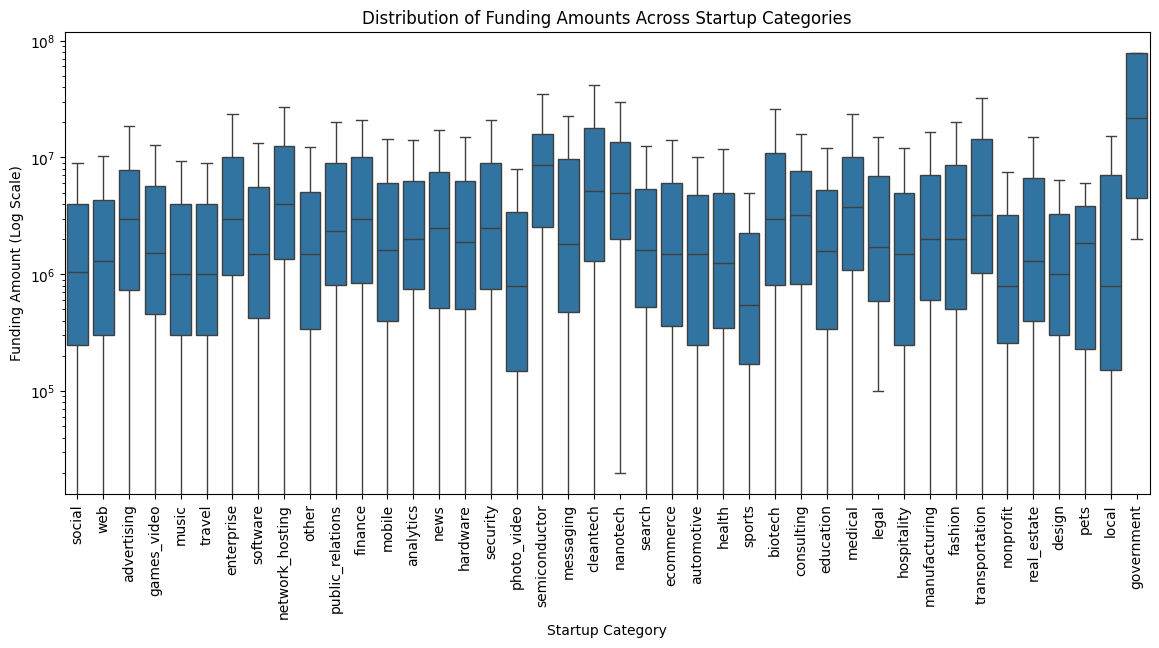

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="category_code", y="raised_amount", data=merged_data1, showfliers=False)
plt.xticks(rotation=90)
plt.yscale("log") 
plt.title("Distribution of Funding Amounts Across Startup Categories")
plt.xlabel("Startup Category")
plt.ylabel("Funding Amount (Log Scale)")
plt.show()

### Line plot

    The line plot clearly shows the flunctuation of inflation, and top 5 startup categories funding. Putting the change in total funding and inflation together allows for a clearer look at both at the same time. 

In [ ]:
world_inflation_by_year = merged_data2.groupby('year')['Inflation, GDP deflator (annual %)'].mean().reset_index()

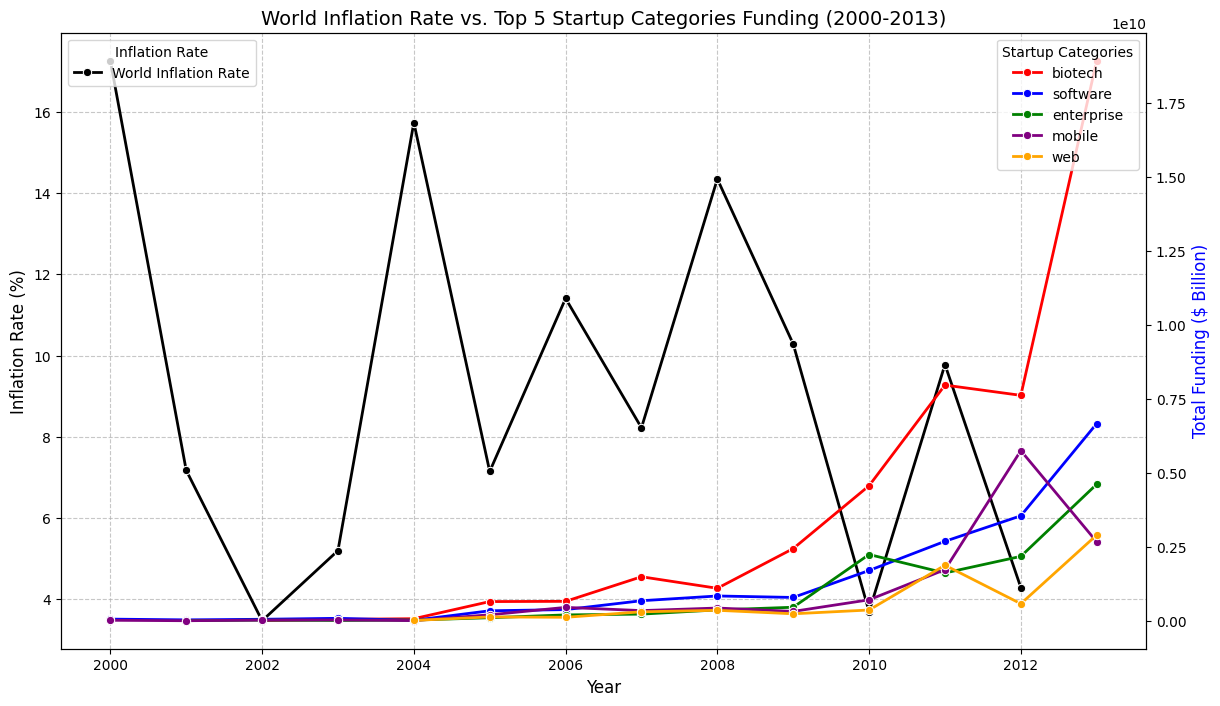

In [ ]:
merged_data1['funded_at'] = pd.to_datetime(merged_data1['funded_at'], errors='coerce')

merged_data1['year'] = merged_data1['funded_at'].dt.year

top_5_categories = merged_data1['category_code'].value_counts(normalize=True).nlargest(5).index

funding_by_category = merged_data1[merged_data1['category_code'].isin(top_5_categories)]
funding_trends = funding_by_category.groupby(['year', 'category_code'])['raised_amount'].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_title('World Inflation Rate vs. Top 5 Startup Categories Funding (2000-2013)', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Inflation Rate (%)', fontsize=12, color='black')
sns.lineplot(data=world_inflation_by_year, x='year', y='Inflation, GDP deflator (annual %)', 
             marker='o', label='World Inflation Rate', linewidth=2, color='black', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Total Funding ($ Billion)', fontsize=12, color='blue')

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, category in enumerate(top_5_categories):
    category_data = funding_trends[funding_trends['category_code'] == category]
    sns.lineplot(data=category_data, x='year', y='raised_amount', marker='o', 
                 label=category, linewidth=2, color=colors[i], ax=ax2)

ax1.legend(loc='upper left', title="Inflation Rate", fontsize=10)
ax2.legend(loc='upper right', title="Startup Categories", fontsize=10)
ax1.grid(True, linestyle="--", alpha=0.7)

plt.show()

### Heatmap

    The heatmap could visualize industry-specific investment trends and detect the impact of 2008 financial crisis. This graph shows that investors stopped investing on several industries during financial crisis period, especially real_estate, whereas some industries even get more investment during that time.

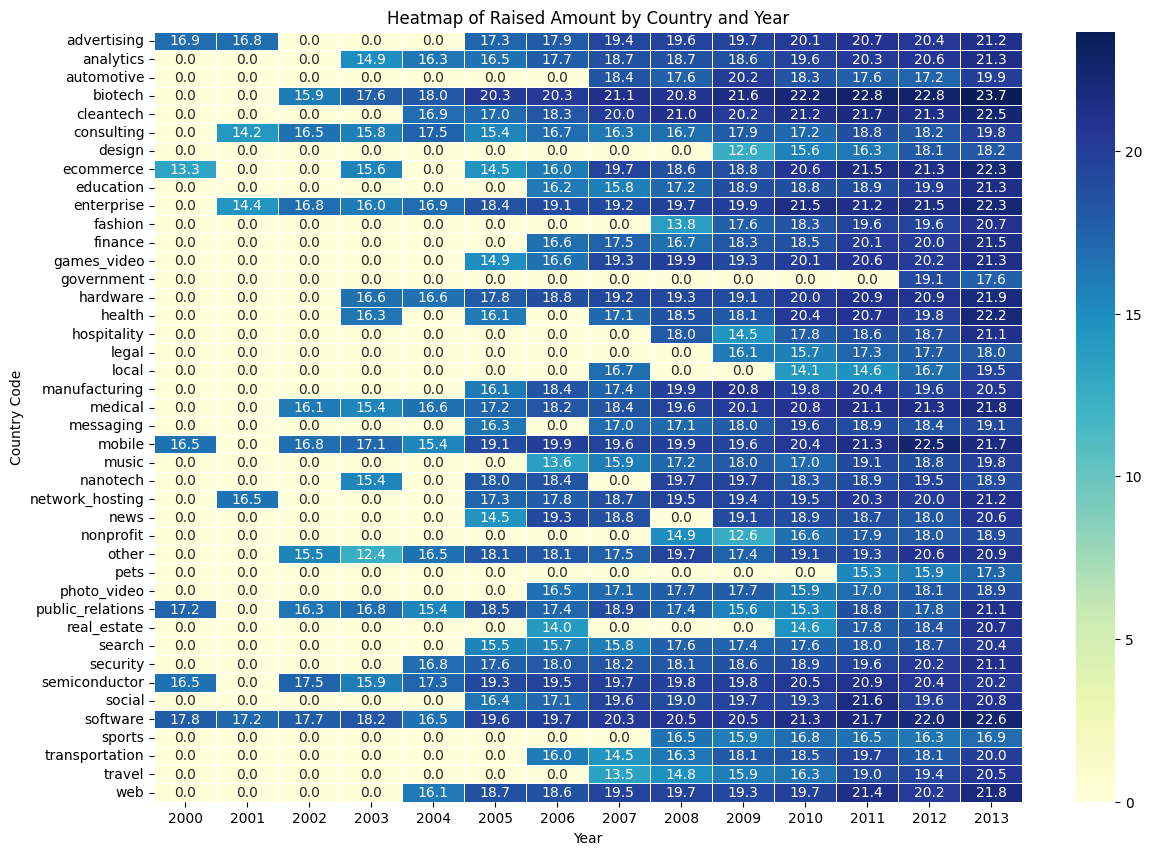

In [ ]:
dfA=merged_data1
dfA=dfA.pivot_table(values='raised_amount', index='category_code', columns='year', aggfunc='sum', fill_value=0)
dfA = np.log1p(dfA)
plt.figure(figsize=(14, 10))
sns.heatmap(dfA, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".1f")
plt.title("Heatmap of Raised Amount by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country Code")
plt.show()

## 

In [503]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

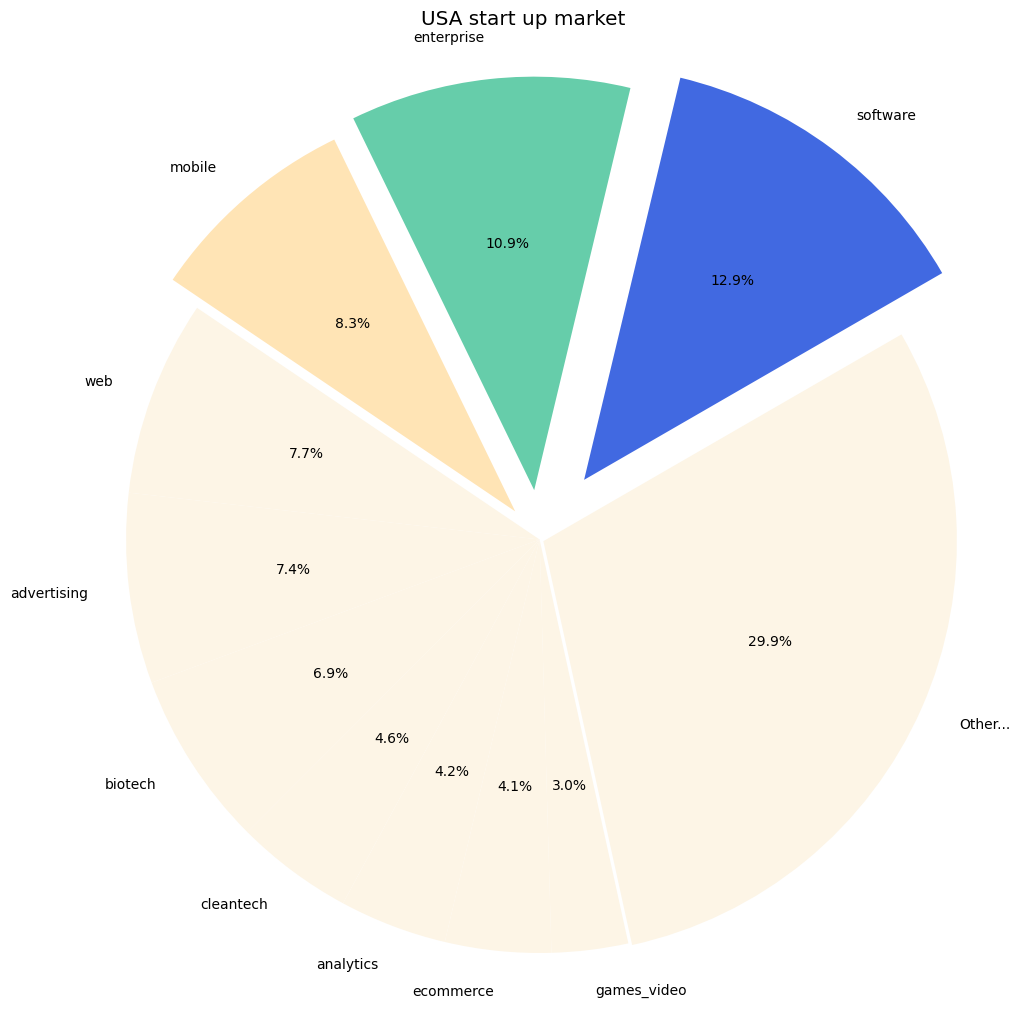

For USA, Most of start up market is about Software & Technology


In [504]:
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['category_code'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()
print('For USA, Most of start up market is about Software & Technology')

In [532]:
CHN_market_pct = country_market_pct[country_market_pct['country_code'] == "CHN"]
CHN_market_pct = CHN_market_pct.sort_values('count',ascending = False)[0:10]

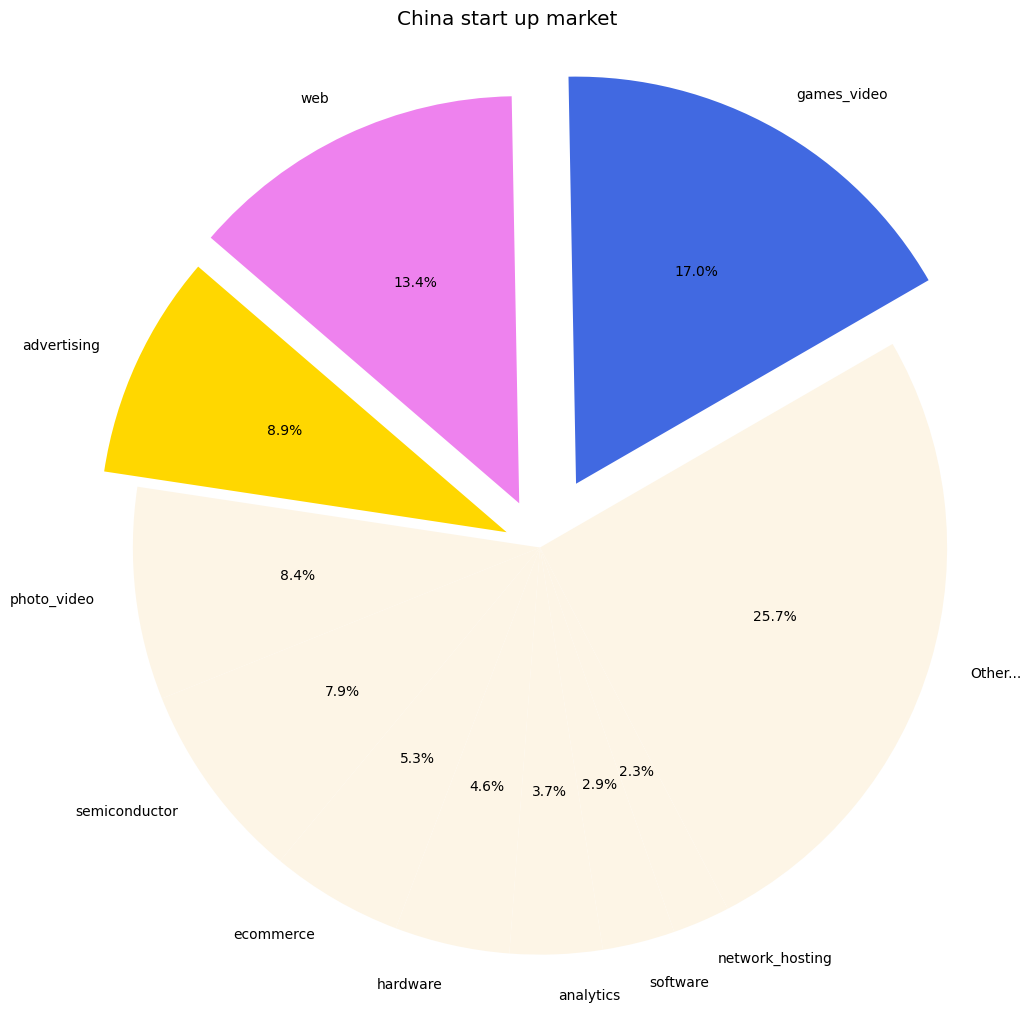

For China, Most of start up market is about games video mainly


In [534]:
plt.rcParams['figure.figsize'] = 10,10
labels = list(CHN_market_pct['category_code'])+['Other...']
sizes = list(CHN_market_pct['count'])+[100-USA_market_pct['count'].sum()]
Nones = (0.18, 0.12, 0.09, 0, 0, 0, 0, 0, 0, 0, 0)
colors =  ['royalblue','violet','gold'] +['oldlace']*8

plt.pie(sizes, explode = Nones, colors = colors ,labels=labels, autopct='%1.1f%%',shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("China start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()
print('For China, Most of start up market is about games video mainly')

# Project 2

## The Message

    My project is about how economic downturns reshape the investors' investing strategies. The economic downturns might have certain affect on investor's changing their investing strategies but there might also have certain other reasons such as reponse behavior could be non-random.(Author links open overlay panelAnnamaria Conti a b et al., 2018)

In [513]:
%pip install geopandas

import geopandas as gpd
from shapely.geometry import Point
world = gpd.read_file('/Users/zzybollar/Downloads/110m_cultural/ne_110m_admin_0_countries.shp')

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [536]:
funding_before_crisis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29404 entries, 0 to 223506
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29404 non-null  int64  
 1   funding_round_id     29404 non-null  int64  
 2   funded_object_id     29404 non-null  object 
 3   investor_object_id   29404 non-null  object 
 4   name_x               2159 non-null   object 
 5   entity_type          29404 non-null  object 
 6   name_y               29404 non-null  object 
 7   permalink            29404 non-null  object 
 8   category_code        29284 non-null  object 
 9   status               29404 non-null  object 
 10  founded_at           29404 non-null  object 
 11  closed_at            1739 non-null   object 
 12  description          29404 non-null  object 
 13  country_code         29404 non-null  object 
 14  first_investment_at  686 non-null    object 
 15  investment_rounds    29404 non-null  int

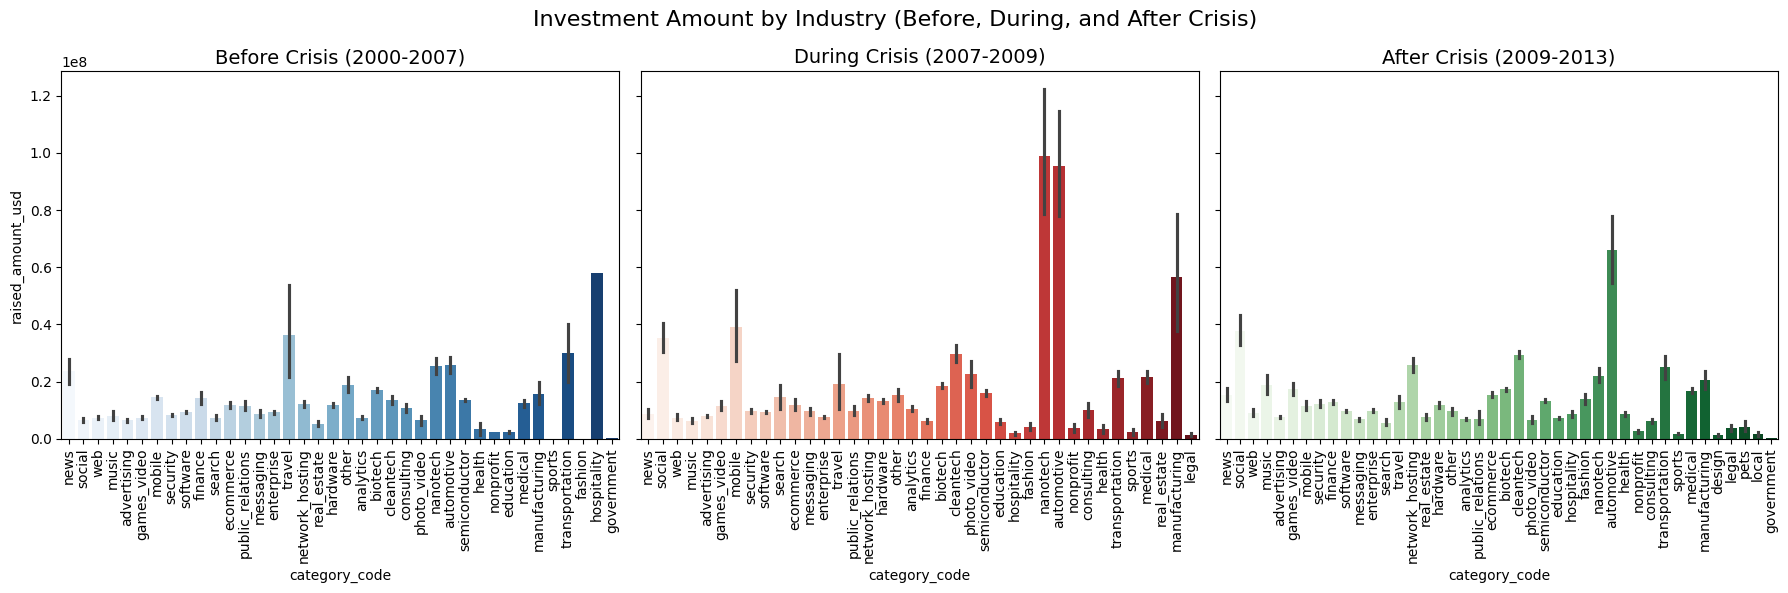

In [540]:
funding_by_category_year = merged_data_combined.groupby(['category_code', 'year'])['raised_amount_usd'].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(data=funding_before_crisis, x='category_code', y='raised_amount_usd', hue='category_code', palette='Blues', ax=axes[0], legend=False)
axes[0].set_title('Before Crisis (2000-2007)', fontsize=14)

sns.barplot(data=funding_during_crisis, x='category_code', y='raised_amount_usd', hue='category_code', palette='Reds', ax=axes[1], legend=False)
axes[1].set_title('During Crisis (2007-2009)', fontsize=14)

sns.barplot(data=funding_after_crisis, x='category_code', y='raised_amount_usd', hue='category_code', palette='Greens', ax=axes[2], legend=False)
axes[2].set_title('After Crisis (2009-2013)', fontsize=14)

for ax in axes:
    ax.set_xticks(range(len(ax.get_xticklabels()))) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.suptitle('Investment Amount by Industry (Before, During, and After Crisis)', fontsize=16)
plt.tight_layout()
plt.show()


## Map and Interpretations

    Two groups of maps shows the total raised amount of high-/low- risks industries during three different time period. The geographic distribution and visualization highlights how different regions impact on the investing strategies or decisions of investors', and how investment strategies varied globally. It is not hard to tell that the raised amount for low-risks industries in some specific region has high stability that did not affected by the significant economic downturns. Whereas looking at the map for high-risks industries, we could see that the speed of the recovery of investment amount varies by continents, some area, for example Asia, showing a stronger rebounds. After the economic downturns, more area on the map were colored which might lead to a conclusion of the investor's tend to invest globally, however, this might also due to the lack of the data in some specific timeline such as before-crisis period and in some specific geographic area.

In [515]:
import geopandas as gpd
from shapely.geometry import Point
world = gpd.read_file('/Users/zzybollar/Downloads/110m_cultural/ne_110m_admin_0_countries.shp')

In [516]:
high_risk_industries = [
    'advertising', 'shoe', 'homebuilding', 'trucking', 'oil/gas__integrated_',
    'telecom._services', 'software__entertainment_', 'bank__money_center_',
    'air_transport', 'publishing___newspapers', 'entertainment', 'semiconductor',
    'real_estate__development_', 'retail__special_lines_', 'retail__automotive_',
    'financial_svcs.__non_bank___insurance_', 'chemical__basic_', 'chemical__specialty_'
]

low_risk_industries = [
    'hospitals/healthcare_facilities', 'education', 'healthcare_products',
    'drugs__biotechnology_', 'construction_supplies', 'food_processing',
    'transportation', 'building_materials', 'business___consumer_services'
]

funding_before_crisis['risk_category'] = funding_before_crisis['category_code'].apply(
	lambda x: 'High-Risk' if x in high_risk_industries else ('Low-Risk' if x in low_risk_industries else 'Other')
)
funding_during_crisis['risk_category'] = funding_during_crisis['category_code'].apply(
	lambda x: 'High-Risk' if x in high_risk_industries else ('Low-Risk' if x in low_risk_industries else 'Other')
)
funding_after_crisis['risk_category'] = funding_after_crisis['category_code'].apply(
	lambda x: 'High-Risk' if x in high_risk_industries else ('Low-Risk' if x in low_risk_industries else 'Other')
)

/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_31493/1968844137.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_before_crisis['risk_category'] = funding_before_crisis['category_code'].apply(
/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_31493/1968844137.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_during_crisis['risk_category'] = funding_during_crisis['category_code'].apply(
/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_31493/1968844137.py:2

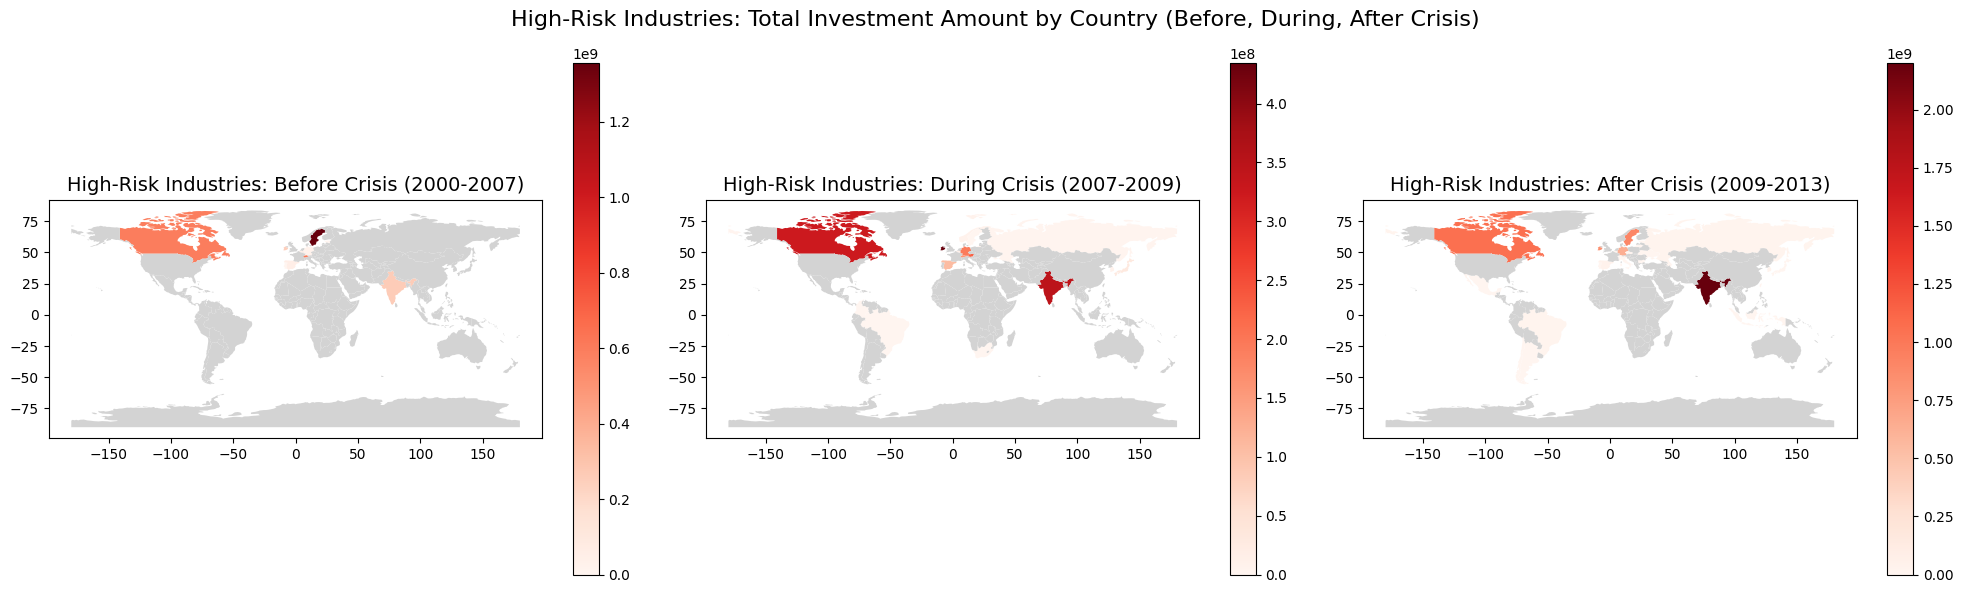

In [543]:
high_risk_data_before = funding_before_crisis[funding_before_crisis['risk_category'] == 'High-Risk']
high_risk_data_during = funding_during_crisis[funding_during_crisis['risk_category'] == 'High-Risk']
high_risk_data_after = funding_after_crisis[funding_after_crisis['risk_category'] == 'High-Risk']

country_funding_before_crisis = high_risk_data_before.groupby("country_code")["raised_amount_usd"].sum().reset_index()
country_funding_during_crisis = high_risk_data_during.groupby("country_code")["raised_amount_usd"].sum().reset_index()
country_funding_after_crisis = high_risk_data_after.groupby("country_code")["raised_amount_usd"].sum().reset_index()

world_before_crisis = world.merge(country_funding_before_crisis, left_on="SOV_A3", right_on="country_code", how="left")
world_during_crisis = world.merge(country_funding_during_crisis, left_on="SOV_A3", right_on="country_code", how="left")
world_after_crisis = world.merge(country_funding_after_crisis, left_on="SOV_A3", right_on="country_code", how="left")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

world_before_crisis.plot(column='raised_amount_usd', cmap='Reds', legend=True, ax=axes[0], missing_kwds={'color': 'lightgrey'})
axes[0].set_title('High-Risk Industries: Before Crisis (2000-2007)', fontsize=14)

world_during_crisis.plot(column='raised_amount_usd', cmap='Reds', legend=True, ax=axes[1], missing_kwds={'color': 'lightgrey'})
axes[1].set_title('High-Risk Industries: During Crisis (2007-2009)', fontsize=14)

world_after_crisis.plot(column='raised_amount_usd', cmap='Reds', legend=True, ax=axes[2], missing_kwds={'color': 'lightgrey'})
axes[2].set_title('High-Risk Industries: After Crisis (2009-2013)', fontsize=14)

plt.suptitle('High-Risk Industries: Total Investment Amount by Country (Before, During, After Crisis)', fontsize=16)
plt.tight_layout()
plt.show()

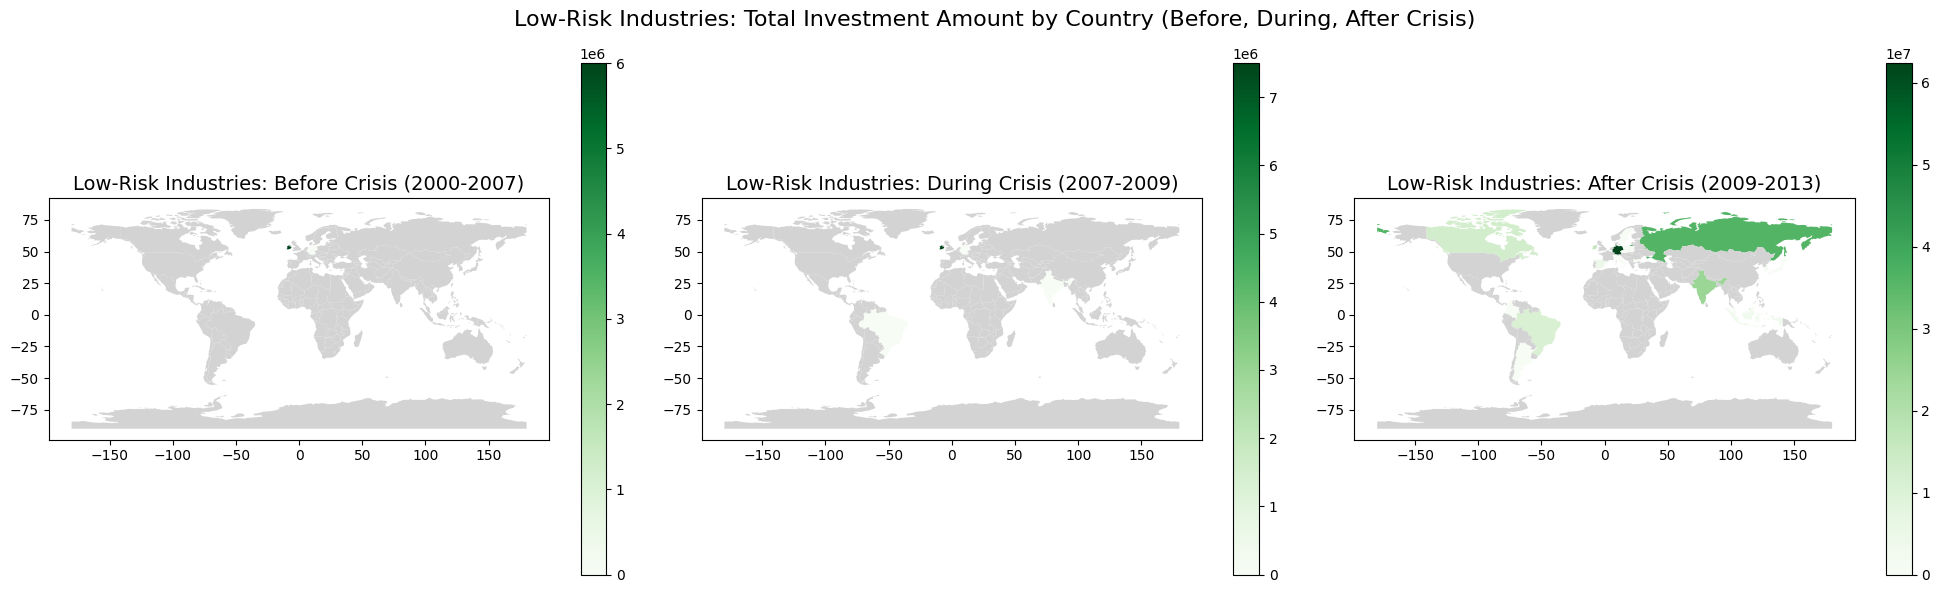

In [544]:
Low_risk_data_before = funding_before_crisis[funding_before_crisis['risk_category'] == 'Low-Risk']
low_risk_data_during = funding_during_crisis[funding_during_crisis['risk_category'] == 'Low-Risk']
low_risk_data_after = funding_after_crisis[funding_after_crisis['risk_category'] == 'Low-Risk']

country_funding_before_crisis1 = Low_risk_data_before.groupby("country_code")["raised_amount_usd"].sum().reset_index()
country_funding_during_crisis1 = low_risk_data_during.groupby("country_code")["raised_amount_usd"].sum().reset_index()
country_funding_after_crisis1 = low_risk_data_after.groupby("country_code")["raised_amount_usd"].sum().reset_index()

world_before_crisis1 = world.merge(country_funding_before_crisis1, left_on="SOV_A3", right_on="country_code", how="left")
world_during_crisis1 = world.merge(country_funding_during_crisis1, left_on="SOV_A3", right_on="country_code", how="left")
world_after_crisis1 = world.merge(country_funding_after_crisis1, left_on="SOV_A3", right_on="country_code", how="left")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

world_before_crisis1.plot(column='raised_amount_usd', cmap='Greens', legend=True, ax=axes[0], missing_kwds={'color': 'lightgrey'})
axes[0].set_title('Low-Risk Industries: Before Crisis (2000-2007)', fontsize=14)

world_during_crisis1.plot(column='raised_amount_usd', cmap='Greens', legend=True, ax=axes[1], missing_kwds={'color': 'lightgrey'})
axes[1].set_title('Low-Risk Industries: During Crisis (2007-2009)', fontsize=14)

world_after_crisis1.plot(column='raised_amount_usd', cmap='Greens', legend=True, ax=axes[2], missing_kwds={'color': 'lightgrey'})
axes[2].set_title('Low-Risk Industries: After Crisis (2009-2013)', fontsize=14)

plt.suptitle('Low-Risk Industries: Total Investment Amount by Country (Before, During, After Crisis)', fontsize=16)
plt.tight_layout()
plt.show()

## Regressions 

This is a regression equation:
$$
logRaisedAmount = \beta_0 + \beta_1 \times \text{Macroeconomic interpretations} + \beta_2 \times \text{Categorial variables} + \beta_3 \times \text{Participants}+\beta_4\times\text{years} +\epsilon
$$

### Regression table 1: with 4 models generating the Macroeconomic indicators Impacts on Total raised amount

    Regression table 1 shows how the macro economic indicators such as inflation rate, real interest rate affect the total raised amount. The result, especially the result for model 8 in this regression model, suggests a diminishing return effect at higher funding levels. The R^2 of model 6 and 8 almost explains all variance. In summary, in this model we could conclude that the participants have negative impact in raise fundings, inflation and VC fundings are highly significant. We could interprets that macroeconomic factors are weak predictors of total funding amount, in other words, investor's is unlikely to change their strategies by decreasing the funding amount during significant economic downturns. 

In [545]:
%pip install stargazer

import statsmodels.api as sm
from stargazer.stargazer import Stargazer

merged_data_combined['Inflation_Interest'] = merged_data_combined['Inflation, GDP deflator (annual %)'] * merged_data_combined['Real interest rate (%)']

merged_data_combined['venture_funding_sum_sq'] = merged_data_combined['venture_funding_sum'] ** 2

X1 = merged_data_combined[['Inflation, GDP deflator (annual %)', 'Real interest rate (%)']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(merged_data_combined['raised_amount_log'], X1).fit()

X6 = merged_data_combined[['Inflation, GDP deflator (annual %)', 'Real interest rate (%)', 'participants', 'venture_funding_sum', 'year']]
X6 = sm.add_constant(X6)
model6 = sm.OLS(merged_data_combined['raised_amount_log'], X6).fit()

X7 = merged_data_combined[['Inflation, GDP deflator (annual %)', 'Real interest rate (%)', 'participants', 'venture_funding_sum', 'Inflation_Interest']]
X7 = sm.add_constant(X7)
model7 = sm.OLS(merged_data_combined['raised_amount_log'], X7).fit()

X8 = merged_data_combined[['Inflation, GDP deflator (annual %)', 'Real interest rate (%)', 'participants', 'venture_funding_sum', 'venture_funding_sum_sq']]
X8 = sm.add_constant(X8)
model8 = sm.OLS(merged_data_combined['raised_amount_log'], X8).fit()

stargazer = Stargazer([model1, model6, model7, model8])

stargazer.covariate_order([
    'const',
    'Inflation, GDP deflator (annual %)',
    'Real interest rate (%)',
    'participants',
    'venture_funding_sum',
    'year',
    'Inflation_Interest',
    'venture_funding_sum_sq'
])

stargazer.custom_columns(['Model 1', 'Model 6', 'Model 7', 'Model 8'], [1, 1, 1, 1])

stargazer.title("Regression Results: Impact of Economic and Investment Factors on Funding")

from IPython.core.display import display, HTML
html_output = stargazer.render_html()
display(HTML(html_output))

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_31493/2099297620.py:43: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


### Regression table 2: Regression Results: Impact of Categoric Factors on Funding

    For the second regression table, I create dummies for those categorial variables such as country code and categories of the startups. I assumes there do have certain investment patterns change, assuming investors change the category preference they would like to invest, or change to invest on other region's startups. The preferred model in this regression table is model 2, which captures about 96% of the variance in funding. The results suggests that these categoric factors will not have significant effects overall, but some specific categorics will lead to a significant increase in total raised amount. However, it do not capture the majority of the variance in the raised amounts.  

In [520]:
continent_mapping = {
    "USA": "North America", "CAN": "North America", "MEX": "North America",
    "BRA": "South America", "ARG": "South America", "CHL": "South America", "COL": "South America", "ECU": "South America",
    "GBR": "Europe", "IRL": "Europe", "FRA": "Europe", "DEU": "Europe", "ESP": "Europe", "NLD": "Europe", "ITA": "Europe",
    "CHE": "Europe", "DNK": "Europe", "NOR": "Europe", "SWE": "Europe", "FIN": "Europe", "POL": "Europe", "BEL": "Europe",
    "RUS": "Europe", "EST": "Europe", "LUX": "Europe", "AUT": "Europe", "GRC": "Europe", "ROM": "Europe", "LTU": "Europe",
    "CYP": "Europe", "PRT": "Europe", "CZE": "Europe", "BGR": "Europe", "UKR": "Europe", "MLT": "Europe", "ISL": "Europe",
    "CHN": "Asia", "IND": "Asia", "JPN": "Asia", "SGP": "Asia", "KOR": "Asia", "TWN": "Asia", "HKG": "Asia", "THA": "Asia",
    "IDN": "Asia", "MYS": "Asia", "VNM": "Asia", "PHL": "Asia", "JOR": "Asia", "ISR": "Asia", "TUR": "Asia", "KHM": "Asia",
    "PRK": "Asia",
    "AUS": "Oceania", "NZL": "Oceania", "NRU": "Oceania",
    "ZAF": "Africa", "NGA": "Africa", "KEN": "Africa", "EGY": "Africa", "SEN": "Africa", "GHA": "Africa", "MAR": "Africa",
    "UGA": "Africa", "SWZ": "Africa", "NER": "Africa",
    "ARE": "Middle East", "HMI": "Middle East", "ANT": "Middle East", "BMU": "Middle East", "GIB": "Middle East", "CYM": "Middle East",
    "SMR": "Middle East", "ALB": "Middle East"
}

In [521]:
categories = ['advertising', 'shoe', 'homebuilding', 'trucking',
       'oil/gas__integrated_', 'telecom._services',
       'software__entertainment_', 'bank__money_center_', 'air_transport',
       'publishing___newspapers', 'entertainment', 'semiconductor',
       'hospitals/healthcare_facilities',
       'total_market__without_financials_', 'retail__special_lines_',
       'building_materials', 'education', 'business___consumer_services',
       'retail__automotive_', 'real_estate__development_',
       'healthcare_products', 'drugs__biotechnology_',
       'financial_svcs.__non_bank___insurance_', 'construction_supplies',
       'chemical__basic_', 'food_processing', 'transportation',
       'chemical__specialty_']

In [522]:
funding_round_types = ['series-a', 'series-c+', 'series-b', 'venture', 'post-ipo', 'angel', 'other', 'private-equity', 'crowdfunding']

In [523]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import display, HTML

n=500
np.random.seed(42)

data = {
    'country_code': np.random.choice(list(continent_mapping.keys()), n),
    'category_code': np.random.choice(categories, n),
    'funding_round_type': np.random.choice(funding_round_types, n),
    'participants': np.random.randint(1, 100, n),
    'venture_funding_sum': np.random.randint(1000, 10000, n),
    'raised_amount': np.random.uniform(10, 20, n)
}

data0 = pd.DataFrame(data)

data0['continent'] = data0['country_code'].map(continent_mapping)

data0['risk_category'] = data0['category_code'].apply(
    lambda x: 'High-Risk' if x in high_risk_industries else ('Low-Risk' if x in low_risk_industries else 'Other')
)

risk_dummies = pd.get_dummies(data0['risk_category'], prefix='risk', drop_first=False)
risk_dummies = risk_dummies.astype(int)
continent_dummies = pd.get_dummies(data0['continent'], prefix='continent', drop_first=False)
continent_dummies = continent_dummies.astype(int)
funding_round_dummies = pd.get_dummies(data0['funding_round_type'], prefix='round', drop_first=False)
funding_round_dummies = funding_round_dummies.astype(int)

data0 = pd.concat([data0, risk_dummies, continent_dummies, funding_round_dummies], axis=1)

X2 = data0[['participants', 'venture_funding_sum']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(data0['raised_amount'], X2).fit()

X3 = data0[['continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(data0['raised_amount'], X3).fit()

X4 = data0[['risk_High-Risk', 'risk_Low-Risk']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(data0['raised_amount'], X4).fit()

X5 = data0[[col for col in data0.columns if col.startswith('round_')]]
X5 = sm.add_constant(X5)
model5 = sm.OLS(data0['raised_amount'], X5).fit()

stargazer = Stargazer([model2, model3, model4, model5])

stargazer.covariate_order([
    'const',
    'participants', 'venture_funding_sum',
    'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America',
    'risk_High-Risk', 'risk_Low-Risk',
    *[col for col in data0.columns if col.startswith('round_')]
])

stargazer.custom_columns(['Model 2', 'Model 3', 'Model 4', 'Model 5'], [1, 1, 1, 1])

stargazer.title("Regression Results: Impact of Categorical Factors on Funding")

html_output = stargazer.render_html()
display(HTML(html_output))

/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_31493/2975994339.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# Web scrapping

In [ ]:
import requests
from bs4 import BeautifulSoup

# Target Investopedia article URL
url = "https://www.investopedia.com/articles/investing/041415/investing-crisis-high-riskhigh-reward-strategy.asp"
headers = {"User-Agent": "Mozilla/5.0"}

# Send request
response = requests.get(url, headers=headers)
print("Status Code:", response.status_code)

# If successful, parse and extract data
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract the article title
    title = soup.find("h1").get_text(strip=True)
    print(f"\nTitle: {title}\n")
    
    # Extract first 3 paragraphs from the article body
    paragraphs = soup.find_all("p")
    for i, p in enumerate(paragraphs[:3]):
        print(f"Paragraph {i+1}:\n{p.get_text(strip=True)}\n")
else:
    print("Failed to access the article.")


Status Code: 200

Title: Investing in Crisis: A High-Risk, High-Reward Strategy

Paragraph 1:
Adam Hayes, Ph.D., CFA, is a financial writer with 15+ years Wall Street experience as a derivatives trader. Besides his extensive derivative trading expertise, Adam is an expert in economics and behavioral finance. Adam received his master's in economics from The New School for Social Research and his Ph.D. from the University of Wisconsin-Madison in sociology. He is a CFA charterholder as well as holding FINRA Series 7, 55 & 63 licenses. He currently researches and teaches economic sociology and the social studies of finance at the Hebrew University in Jerusalem.

Paragraph 2:
The financial crisis of 2008 and the Great Recession that followed are still fresh in many investors' memories. People saw their portfolios lose 30% or more of their values, and older workers saw their401(k) plansandIRAsdrop to levels that threatened their retirement plans.Instead of acting rationally during severebear

# Regression Tree

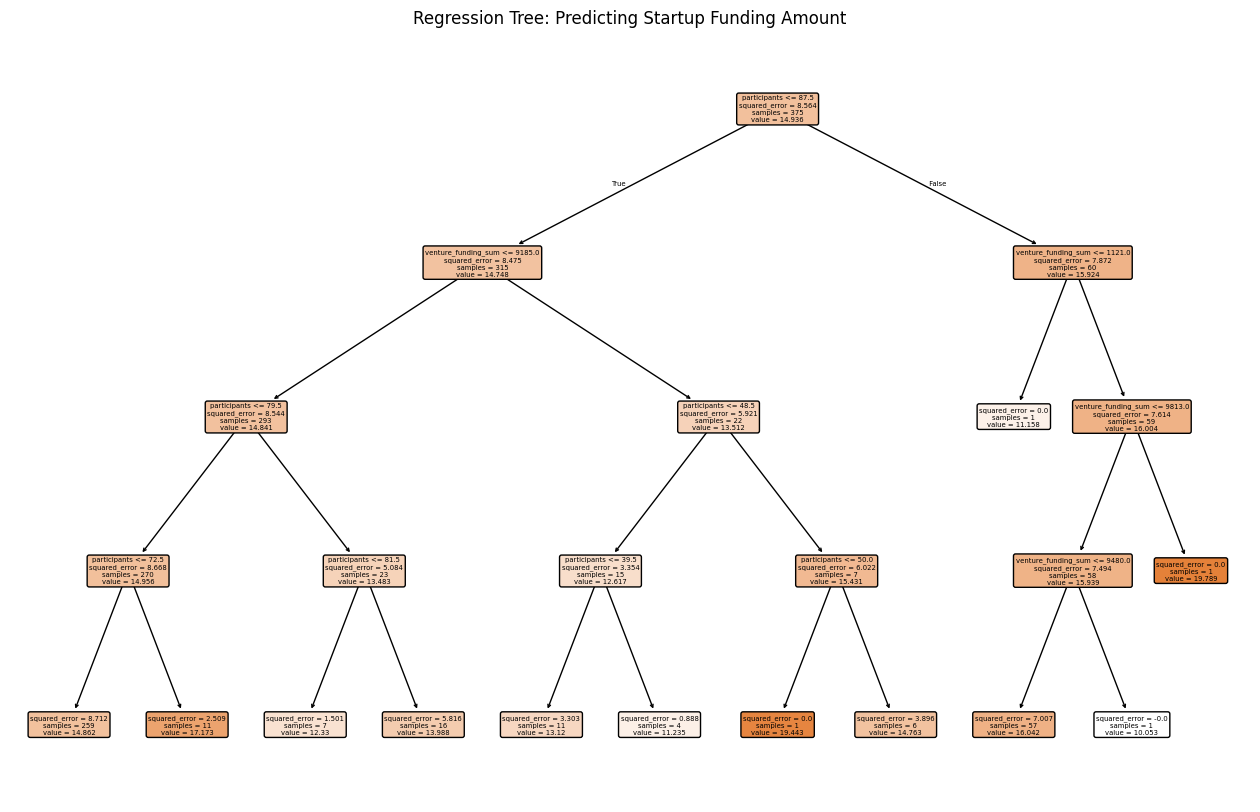

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500
data = {
    'participants': np.random.randint(1, 100, n),
    'venture_funding_sum': np.random.randint(1000, 10000, n),
    'raised_amount': np.random.uniform(10, 20, n)  # target variable
}

df = pd.DataFrame(data)

X = df[['participants', 'venture_funding_sum']]
y = df['raised_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Tree: Predicting Startup Funding Amount")
plt.show()

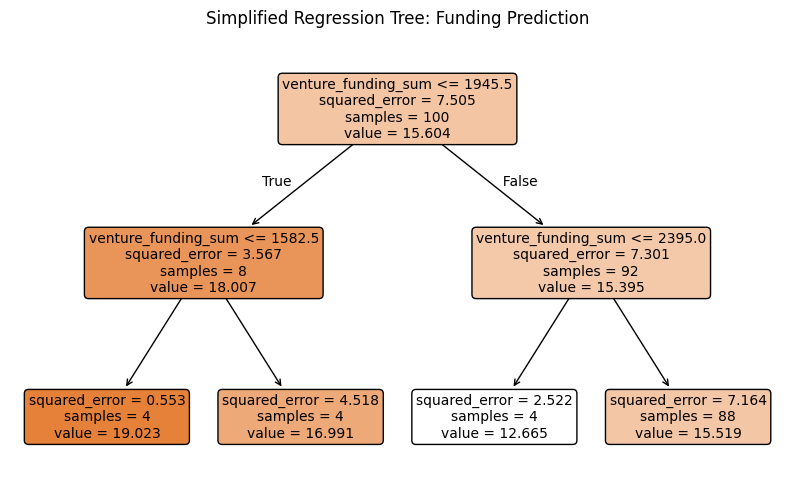

In [ ]:
np.random.seed(42)
n = 100
df6 = pd.DataFrame({
    'participants': np.random.randint(1, 100, n),
    'venture_funding_sum': np.random.randint(1000, 10000, n),
    'raised_amount': np.random.uniform(10, 20, n)  # target
})

X = df6[['participants', 'venture_funding_sum']]
y = df6['raised_amount']
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=['participants', 'venture_funding_sum'],
          filled=True, rounded=True, fontsize=10)
plt.title("Simplified Regression Tree: Funding Prediction")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (2,) and arg 3 with shape (5,).

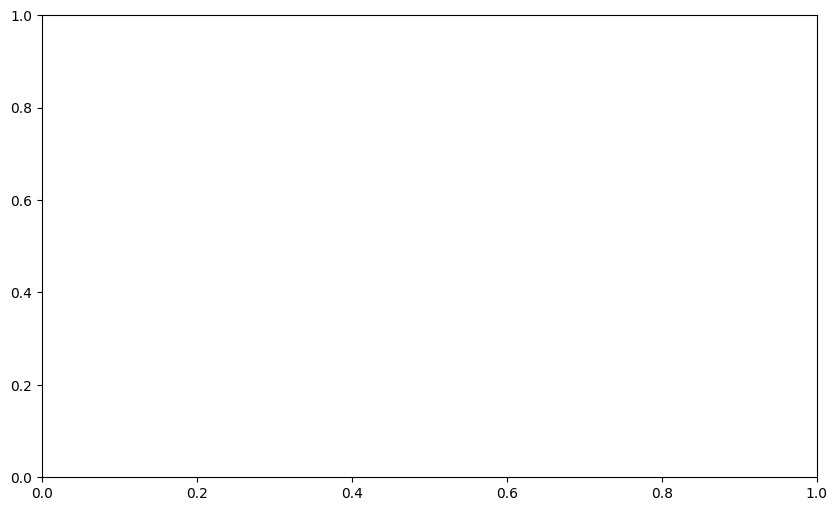

In [546]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[sorted_idx], align='center', color='red')
plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
plt.xlabel('Variable Importance')
plt.title('Feature Importance for Predicting Startup Funding (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Future steps:
    In the future project, I will track the long-term effect propably by using most recent data to see the patterns of the investment and add the policy of different region to analyze since different policies in different region might also affect investors' investing strategies and behavior. Also, after studying ML, this will also be added into this project therefore to enhance the capabilities of analytics, developing models to predit how future economic downturns might affect the startup investments and predict what actions investors' might take. I will also do more research on classifiying the industry categories into high-/low-risks since most industry categories could not be simply classified as high/low risk industry, it's way more complex.

# Conclusion

    It is undoubt that the significant economic downturns such as 2008 financial crisis will reshape the investment market.[4] But they are not affecting the investment market by reducing the total volume of investments, instead, they are changing the investment strategy and evaluation criteria of the investors for those startups. The effect brought by economic downturns are long_lasting and various from area to area due to different policies. After the economic has recovered from financial crisis, the investment for safer and basic category has increase. The investors' investing strategies and invested history, government policy, and country's overall economic performances will be really helpful for those who is planning to start their entity and want to seek investors. 

# Citations:
[1]Kenton, W. (n.d.). Market cycles: Definition, how they work, and types. Investopedia. https://www.investopedia.com/terms/m/market_cycles.asp 

[2]Gompers, P., Gornall, W., Kaplan, S. N., & Strebulaev, I. A. (2020). How do venture capitalists make decisions? Journal of Financial Economics, 135(1), 169–190. https://doi.org/10.1016/j.jfineco.2019.06.011

[3]Chen, S.-H., & Tsai, C.-H. (2011). Investment preference, risk perception, and portfolio choices under different socio-economic status: Some experimental evidences from individual investors. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.1787842

[4]Conti, A., Dass, N., Di Lorenzo, F., & Graham, S. J. H. (2019). Venture capital investment strategies under financing constraints: Evidence from the 2008 financial crisis. Research Policy, 48(3), 799–812. https://doi.org/10.1016/j.respol.2018.11.009

[5]Carniel, T., Gastaud, C., & Dalle, J. M. (2019). The temporal evolution of venture investment strategies in sector space. arXiv preprint arXiv:1906.01980. https://doi.org/10.48550/arXiv.1906.01980

[6]Author links open overlay panelArvid O.I. Hoffmann a b, a, b, c, d, e, AbstractCombining monthly survey data with matching trading records, Aloui, R., Bailey, W., Bauer, R., Baur, D. G., Glaser, M., Güntay, L., Jin, J. Y., Kahneman, D., Kapteyn, A., Lam, C. F., Longstaff, F. A., Moshirian, F., … Driscoll, J. C. (2012, August 23). Individual investor perceptions and behavior during the financial crisis. Journal of Banking & Finance. https://www.sciencedirect.com/science/article/abs/pii/S0378426612002294 